Loading data from: ..\data\02_processed\kmer_features.csv
Clustering results successfully generated.

Analyzing cluster sizes...

--- Cluster Summary ---
   Cluster ID  Number of Sequences
0           0                 9509
1           1                13614
2           2                 8480
3           3                 5712
4           4                11072
5           5                 1613

Creating final summary visualization...


C:\Users\Komal\AppData\Local\Temp\ipykernel_18724\1131362650.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster ID', y='Number of Sequences', data=cluster_summary, palette='viridis')


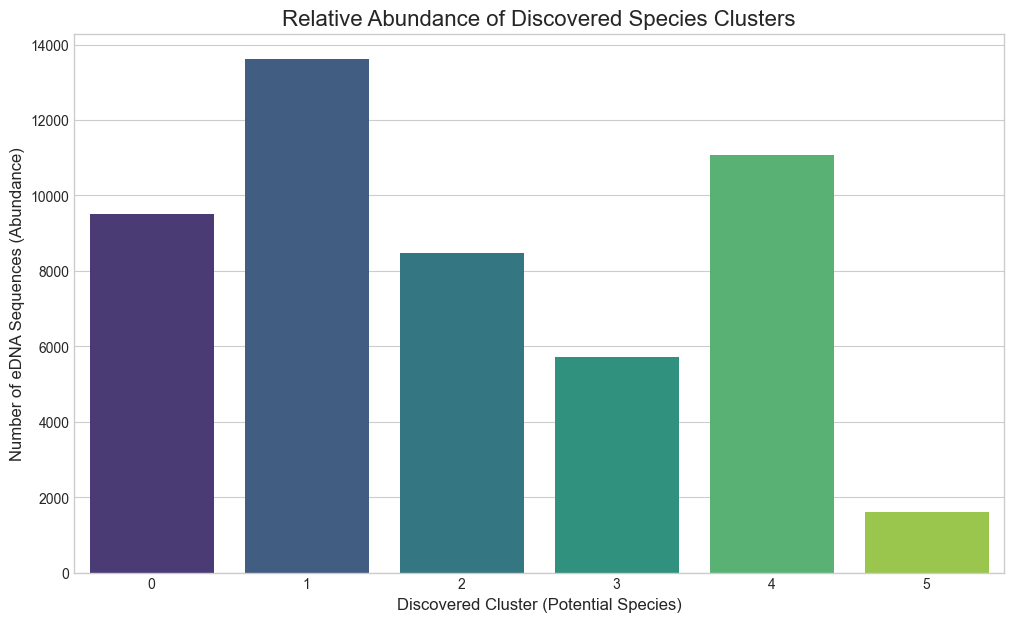


--- Interpretation and Next Steps ---
The bar chart above shows the distribution of the 6 potential species discovered in the eDNA sample.
For example, some clusters are very abundant, while others are relatively rare.

**Next Step: Taxonomic Assignment**
To identify the actual species for each cluster, a biologist would:
1. Select a few representative DNA sequences from each cluster.
2. Use a tool like NCBI BLAST to compare these sequences against a global database of known DNA.
3. A high-similarity match would allow us to assign a species name (e.g., 'Foraminifera', 'Bacteria') to each cluster.

This completes our data analysis pipeline. We have successfully taken raw eDNA data, processed it, and used unsupervised learning to discover and quantify the biodiversity within it.


In [1]:
# Import necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Clustered Data ---
# Note: This notebook assumes you have run '03_model_development.ipynb' and it has
# produced the pca_df DataFrame with cluster labels. For reproducibility, we will
# re-run the core logic from notebook 03 to generate the results again.

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the processed k-mer features
processed_file_path = os.path.join('..', 'data', '02_processed', 'kmer_features.csv')
print(f"Loading data from: {processed_file_path}")
feature_df = pd.read_csv(processed_file_path)

# Sample the data
SAMPLE_SIZE = 50000
data_sample = feature_df.sample(n=SAMPLE_SIZE, random_state=42)

# Scale and apply PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_sample)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Apply K-Means with the optimal k we found
OPTIMAL_K = 6
kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init=10)
pca_df['cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])
print("Clustering results successfully generated.")

# --- 2. Analyze Cluster Sizes (Biodiversity Metrics) ---
# We will now count the number of sequences in each cluster. This represents
# the relative abundance of each potential species in our sample.
print("\nAnalyzing cluster sizes...")
cluster_counts = pca_df['cluster'].value_counts().sort_index()

# Create a DataFrame for easier plotting and viewing
cluster_summary = pd.DataFrame({
    'Cluster ID': cluster_counts.index,
    'Number of Sequences': cluster_counts.values
})

print("\n--- Cluster Summary ---")
print(cluster_summary)

# --- 3. Create Final Summary Visualization ---
# A bar chart is an excellent way to visualize the relative abundance of each cluster.
print("\nCreating final summary visualization...")

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))
sns.barplot(x='Cluster ID', y='Number of Sequences', data=cluster_summary, palette='viridis')

plt.title('Relative Abundance of Discovered Species Clusters', fontsize=16)
plt.xlabel('Discovered Cluster (Potential Species)', fontsize=12)
plt.ylabel('Number of eDNA Sequences (Abundance)', fontsize=12)
plt.xticks(rotation=0) # Keep cluster labels horizontal
plt.show()

# --- 4. Interpretation and Next Steps: Taxonomic Assignment ---
print("\n--- Interpretation and Next Steps ---")
print("The bar chart above shows the distribution of the 6 potential species discovered in the eDNA sample.")
print("For example, some clusters are very abundant, while others are relatively rare.")
print("\n**Next Step: Taxonomic Assignment**")
print("To identify the actual species for each cluster, a biologist would:")
print("1. Select a few representative DNA sequences from each cluster.")
print("2. Use a tool like NCBI BLAST to compare these sequences against a global database of known DNA.")
print("3. A high-similarity match would allow us to assign a species name (e.g., 'Foraminifera', 'Bacteria') to each cluster.")
print("\nThis completes our data analysis pipeline. We have successfully taken raw eDNA data, processed it, and used unsupervised learning to discover and quantify the biodiversity within it.")

